<a href="https://colab.research.google.com/github/amanscodings/CS131/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plot

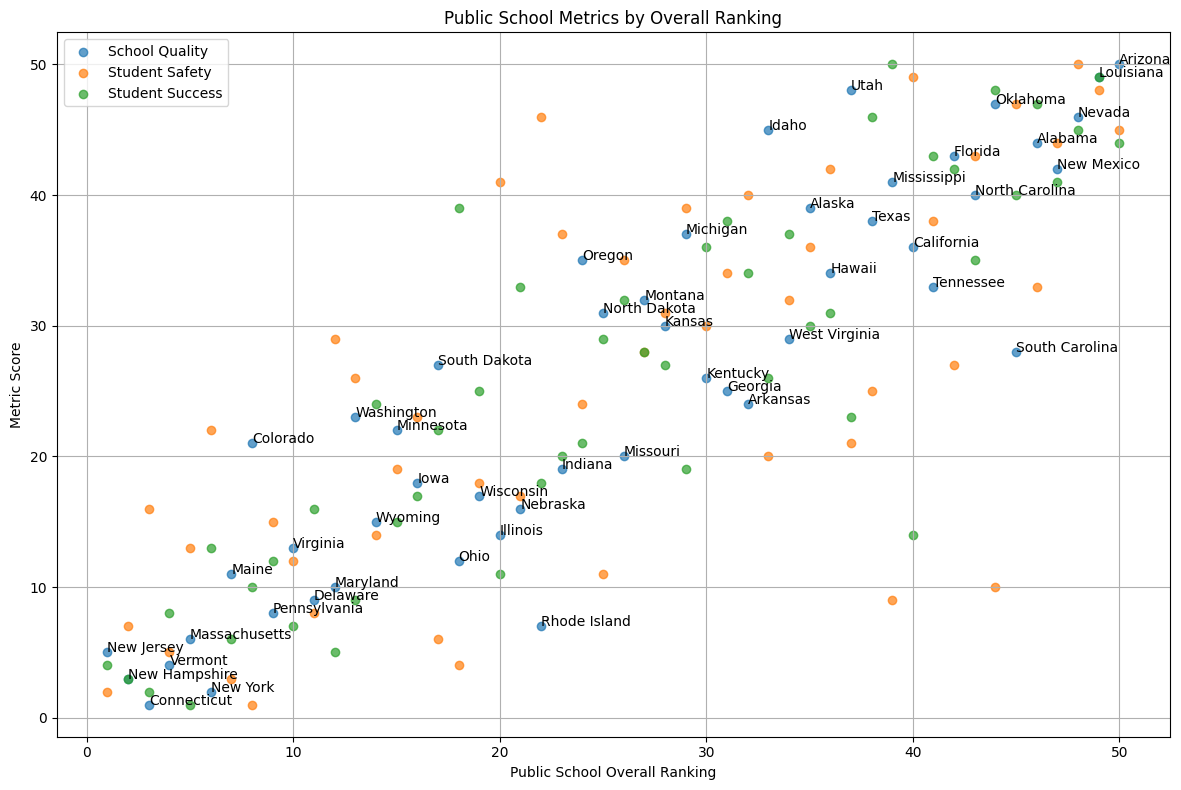

         ï»¿_id  PublicSchoolOverallRanking  PublicSchoolSchoolQuality  \
count  50.00000                    50.00000                   50.00000   
mean   25.50000                    25.50000                   25.50000   
std    14.57738                    14.57738                   14.57738   
min     1.00000                     1.00000                    1.00000   
25%    13.25000                    13.25000                   13.25000   
50%    25.50000                    25.50000                   25.50000   
75%    37.75000                    37.75000                   37.75000   
max    50.00000                    50.00000                   50.00000   

       PublicSchoolStudentSafety  PublicSchoolStudentSuccess  
count                   50.00000                    50.00000  
mean                    25.50000                    25.50000  
std                     14.57738                    14.57738  
min                      1.00000                     1.00000  
25%               

In [18]:
# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot each metric against PublicSchoolOverallRanking
plt.scatter(universities_df['PublicSchoolOverallRanking'], universities_df['PublicSchoolSchoolQuality'], label='School Quality', alpha=0.7)
plt.scatter(universities_df['PublicSchoolOverallRanking'], universities_df['PublicSchoolStudentSafety'], label='Student Safety', alpha=0.7)
plt.scatter(universities_df['PublicSchoolOverallRanking'], universities_df['PublicSchoolStudentSuccess'], label='Student Success', alpha=0.7)

# Customize the plot
plt.title('Public School Metrics by Overall Ranking')
plt.xlabel('Public School Overall Ranking')
plt.ylabel('Metric Score')
plt.legend()

# Add state labels to points
for i, state in enumerate(universities_df['state']):
    plt.annotate(state, (universities_df['PublicSchoolOverallRanking'][i], universities_df['PublicSchoolSchoolQuality'][i]))

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics
print(universities_df.describe())

# Print correlation matrix
print("\nCorrelation Matrix:")
print(universities_df[['PublicSchoolOverallRanking', 'PublicSchoolSchoolQuality',
                       'PublicSchoolStudentSafety', 'PublicSchoolStudentSuccess']].corr())

In [20]:
# Filter schools with Overall Ranking and Student Success of 35 or higher
high_ranking_schools = universities_df[
    (universities_df['PublicSchoolOverallRanking'] >= 35) &
    (universities_df['PublicSchoolStudentSuccess'] >= 35)
]

# Sort the result by Overall Ranking in descending order
high_ranking_schools_sorted = high_ranking_schools.sort_values('PublicSchoolOverallRanking', ascending=False)

# Select relevant columns, reset index starting from 1, and take only the top 10
display_df = high_ranking_schools_sorted[['state', 'PublicSchoolOverallRanking', 'PublicSchoolStudentSuccess']].reset_index(drop=True).head(10)
display_df.index = display_df.index + 1  # This line adjusts the index to start from 1

# Function to color cells based on value
def color_cells(val):
    color = f'background-color: rgba(66, 135, 245, {val/50})'
    return color

# Create a styled DataFrame
styled_df = display_df.style.applymap(color_cells, subset=['PublicSchoolOverallRanking', 'PublicSchoolStudentSuccess'])

# Set table styles
styled_df = styled_df.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4287f5'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid #ddd'), ('font-family', 'Arial, sans-serif')]}
])

# Set caption
styled_df = styled_df.set_caption("Top 10 Schools with Overall Ranking and Student Success of 35 or higher")

# Display the styled DataFrame
display(styled_df)

# Optional: Save as HTML file
styled_df.to_html('top_10_high_ranking_schools.html', index=True)

<ipython-input-20-c7a4d6f40c13>:20: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = display_df.style.applymap(color_cells, subset=['PublicSchoolOverallRanking', 'PublicSchoolStudentSuccess'])


,state,PublicSchoolOverallRanking,PublicSchoolStudentSuccess
1,Arizona,50,44
2,Louisiana,49,49
3,Nevada,48,45
4,New Mexico,47,41
5,Alabama,46,47
6,South Carolina,45,40
7,Oklahoma,44,48
8,North Carolina,43,35
9,Florida,42,42
10,Tennessee,41,43


In [17]:
# Filter schools with Overall Ranking and Student Success of 25 or below
high_ranking_schools = universities_df[
    (universities_df['PublicSchoolOverallRanking'] <= 25) &
    (universities_df['PublicSchoolStudentSuccess'] <= 25)
]

# Sort the result by Overall Ranking in ascending order
high_ranking_schools_sorted = high_ranking_schools.sort_values('PublicSchoolOverallRanking')

# Select relevant columns and reset index
display_df = high_ranking_schools_sorted[['state', 'PublicSchoolOverallRanking', 'PublicSchoolStudentSuccess']].reset_index(drop=True)

# Function to color cells based on value (lower is better)
def color_cells(val):
    color = f'background-color: rgba(66, 135, 245, {1 - val/25})'
    return color

# Create a styled DataFrame
styled_df = display_df.style.applymap(color_cells, subset=['PublicSchoolOverallRanking', 'PublicSchoolStudentSuccess'])

# Set table styles
styled_df = styled_df.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4287f5'), ('color', 'white'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid #ddd'), ('font-family', 'Arial, sans-serif')]}
])

# Set caption
styled_df = styled_df.set_caption("Schools with Overall Ranking and Student Success of 25 or below")

# Display the styled DataFrame
display(styled_df)

# Print the count
print(f"\nTotal number of schools meeting the criteria: {len(display_df)}")

# Optional: Save as HTML file
styled_df.to_html('top_ranking_schools.html', index=False)

<ipython-input-17-0fe4864f3bd0>:19: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = display_df.style.applymap(color_cells, subset=['PublicSchoolOverallRanking', 'PublicSchoolStudentSuccess'])


,state,PublicSchoolOverallRanking,PublicSchoolStudentSuccess
0,New Jersey,1,4
1,New Hampshire,2,3
2,Connecticut,3,2
3,Vermont,4,8
4,Massachusetts,5,1
5,New York,6,13
6,Maine,7,6
7,Colorado,8,10
8,Pennsylvania,9,12
9,Virginia,10,7



Total number of schools meeting the criteria: 22


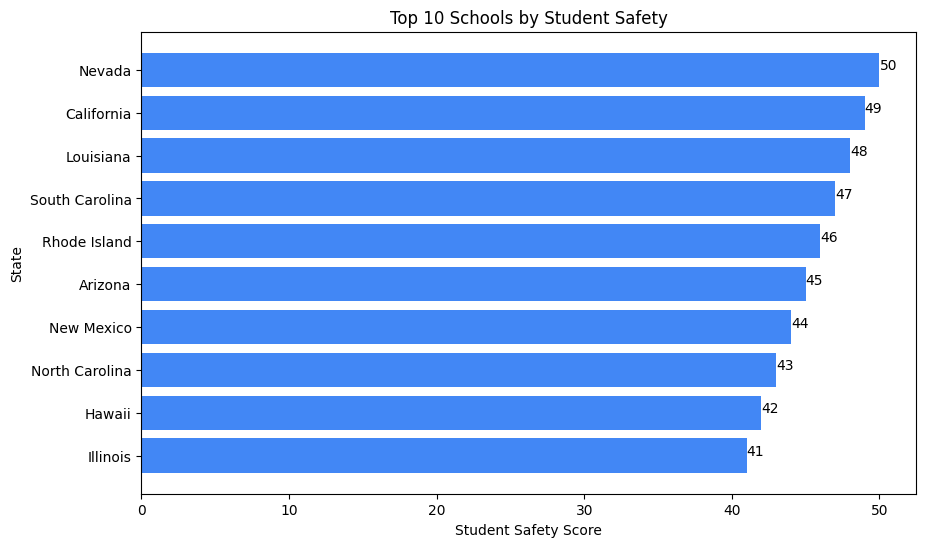

In [21]:
top_safety_schools = universities_df[['state', 'PublicSchoolStudentSafety']].sort_values(
    'PublicSchoolStudentSafety', ascending=False).head(10)

# Reset index for plotting
top_safety_schools = top_safety_schools.reset_index(drop=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_safety_schools['state'], top_safety_schools['PublicSchoolStudentSafety'], color='#4287f5')
plt.xlabel('Student Safety Score')
plt.ylabel('State')
plt.title('Top 10 Schools by Student Safety')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top

# Optional: Add data labels to the bars
for index, value in enumerate(top_safety_schools['PublicSchoolStudentSafety']):
    plt.text(value, index, str(value))

# Display the chart
plt.show()